In [4]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [5]:
def LoadDF():
    df = []
    for i in os.listdir(os.getcwd()):
        if i.endswith(".csv"):
            df.append(pd.read_csv(i))
    return pd.concat(df, axis="rows")

In [6]:
combine_df = LoadDF()

In [7]:
combine_df.tail()

,Employment History,Employment Status,Age,Population estimate,Percentage within age and employment history,Percentage within age and employment status,Percentage within employment status and employment history,Country,Employment status,Percentage within country and employment history,Percentage within country and employment status,Ethnicity,Percentage within ethnicity and employment history,Percentage within ethnicity and employment status,Religion,Percentage within religion and employment history,Percentage within religion and employment status,Sex,Percentage within sex and employment history,Percentage within sex and employment status,Percentage within age,Percentage within employment history,Percentage within employment status,Percentage within religion,Percentage within sex,Percentage Estimate,Title,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 OCT,3.9
899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 NOV,3.8
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 DEC,4.0
901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024 JAN,4.2
902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024 FEB,4.3


In [8]:
combine_df['Employment status'].value_counts()

Economically Inactive - Other                         1200
Unemployed                                             186
Economically Inactive - Student                        186
Economically Inactive - Looking After Family/Home      186
Economically Inactive - Long-term Sick or Disabled     186
Economically Inactive - Retired                        186
Name: Employment status, dtype: int64

In [9]:
combine_df['Employment status'].value_counts()

Economically Inactive - Other                         1200
Unemployed                                             186
Economically Inactive - Student                        186
Economically Inactive - Looking After Family/Home      186
Economically Inactive - Long-term Sick or Disabled     186
Economically Inactive - Retired                        186
Name: Employment status, dtype: int64

In [10]:
combine_df.isnull().sum()

Employment History                                               903
Employment Status                                               1536
Age                                                             1533
Population estimate                                              903
Percentage within age and employment history                    1572
Percentage within age and employment status                     1572
Percentage within employment status and employment history       996
Country                                                         2238
Employment status                                               1716
Percentage within country and employment history                2238
Percentage within country and employment status                 2238
Ethnicity                                                       1968
Percentage within ethnicity and employment history              1968
Percentage within ethnicity and employment status               1968
Religion                          

In [11]:
combine_df.shape

(3846, 28)

In [12]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3846 entries, 0 to 902
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Employment History                                            2943 non-null   object 
 1   Employment Status                                             2310 non-null   object 
 2   Age                                                           2313 non-null   object 
 3   Population estimate                                           2943 non-null   float64
 4   Percentage within age and employment history                  2274 non-null   float64
 5   Percentage within age and employment status                   2274 non-null   float64
 6   Percentage within employment status and employment history    2850 non-null   float64
 7   Country                                                       1608 non

In [13]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


In [14]:
# Handle missing values
combine_df.fillna(method='ffill', inplace=True)

In [15]:
combine_df.describe()

,Population estimate,Percentage within age and employment history,Percentage within age and employment status,Percentage within employment status and employment history,Percentage within country and employment history,Percentage within country and employment status,Percentage within ethnicity and employment history,Percentage within ethnicity and employment status,Percentage within religion and employment history,Percentage within religion and employment status,Percentage within sex and employment history,Percentage within sex and employment status,Percentage within age,Percentage within employment history,Percentage within employment status,Percentage within religion,Percentage within sex,Percentage Estimate,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
count,3.846000e+03,3846.000000,3846.000000,3846.000000,3612.000000,3612.000000,3576.000000,3576.000000,3234.000000,3234.000000,3072.000000,3072.000000,3036.000000,3036.000000,2997.000000,2979.000000,2952.000000,2946.000000,2943.000000
mean,1.395368e+06,9.744774,13.196100,33.066069,18.365449,33.790642,21.141051,45.437248,18.766419,33.123253,22.461003,36.621289,1.733136,45.944730,36.165566,15.234273,14.476965,13.141208,5.775025
std,1.400226e+06,9.572231,12.876931,25.594000,2.154516,2.945410,6.015094,10.517675,4.330242,6.490190,2.554499,3.191969,6.216191,9.082145,2.282888,3.454999,1.772461,1.298856,2.196479
min,5.000000e+01,0.000000,0.500000,0.000000,2.400000,3.000000,0.500000,1.800000,1.200000,2.700000,2.500000,3.300000,0.900000,0.400000,3.400000,10.000000,12.100000,13.100000,3.400000
25%,1.727500e+04,8.200000,8.700000,2.600000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,4.300000
50%,7.082825e+05,8.200000,8.700000,53.900000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,4.500000
75%,2.729755e+06,8.200000,8.700000,53.900000,18.400000,33.800000,22.200000,48.300000,19.000000,33.100000,22.600000,36.700000,0.900000,48.000000,36.200000,14.900000,14.400000,13.100000,6.900000
max,1.276298e+07,97.400000,83.800000,96.000000,68.100000,84.000000,76.400000,83.600000,78.400000,83.700000,71.600000,83.200000,82.900000,67.900000,82.400000,70.700000,62.400000,61.400000,11.900000


In [16]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


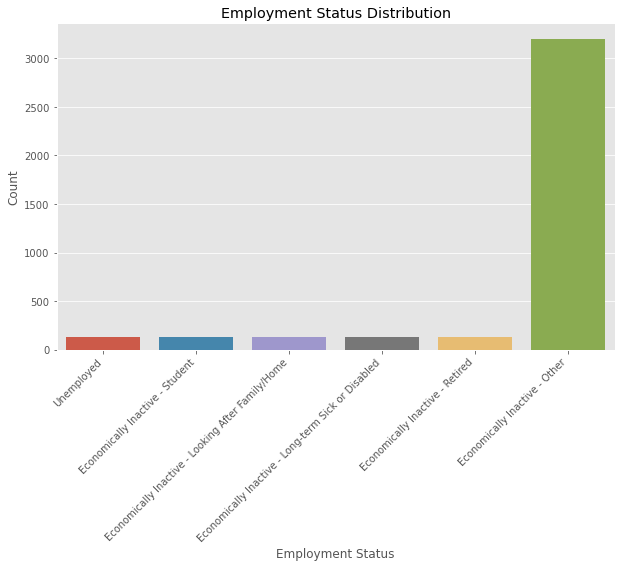

In [17]:
# Example: Employment status distribution with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment Status', data=combine_df)
plt.title('Employment Status Distribution')
plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better readability
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

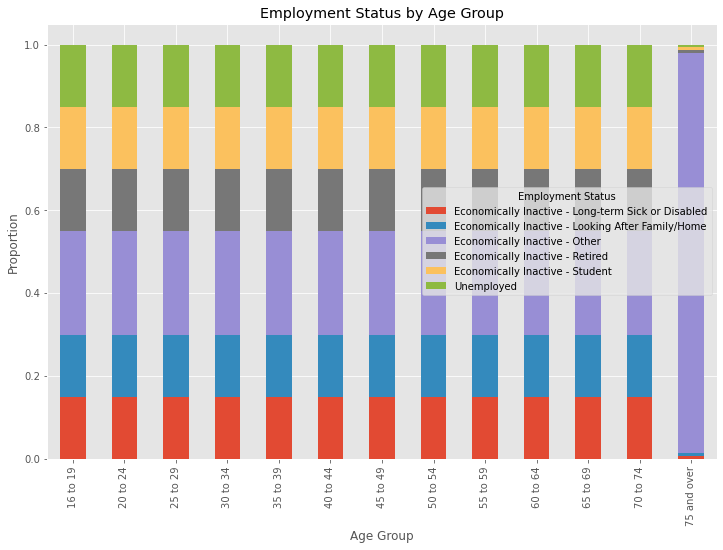

In [18]:
# Cross-tabulation example: Employment status by age group
employment_by_age = pd.crosstab(combine_df['Age'], combine_df['Employment Status'], normalize='index')
employment_by_age.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Employment Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()

In [19]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


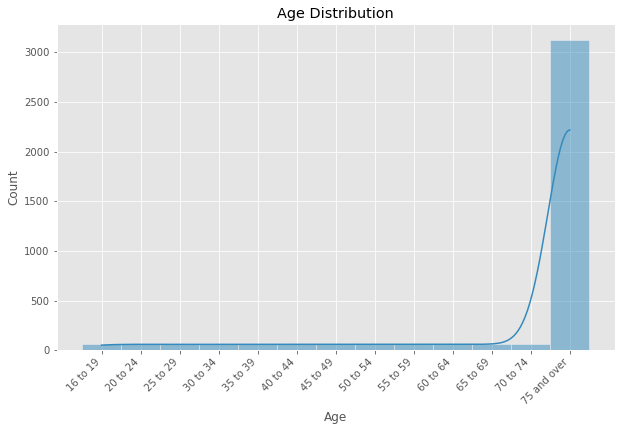

In [25]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(combine_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
combine_df['Age'].value_counts()

75 and over    3126
16 to 19         60
20 to 24         60
25 to 29         60
30 to 34         60
35 to 39         60
40 to 44         60
45 to 49         60
50 to 54         60
55 to 59         60
60 to 64         60
65 to 69         60
70 to 74         60
Name: Age, dtype: int64

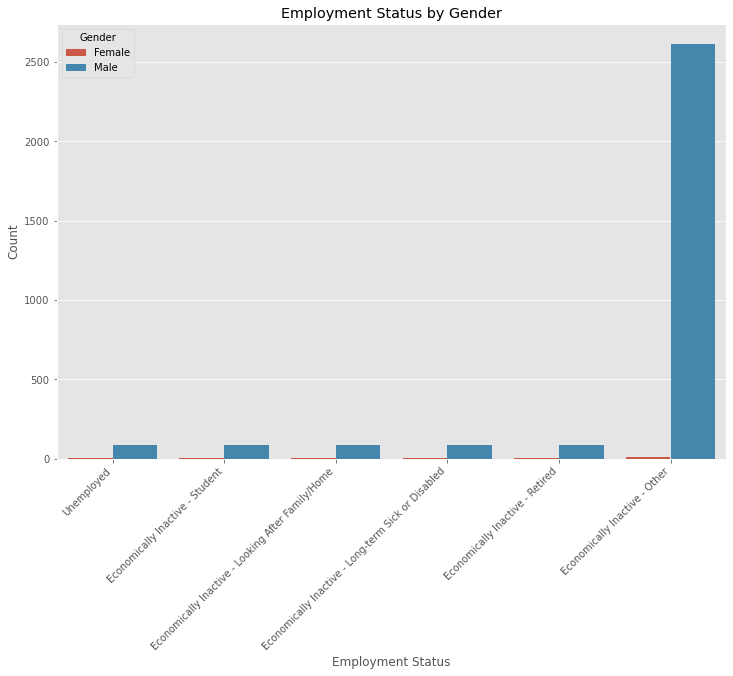

In [27]:
# Employment status by gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Sex', data=combine_df)
plt.title('Employment Status by Gender')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


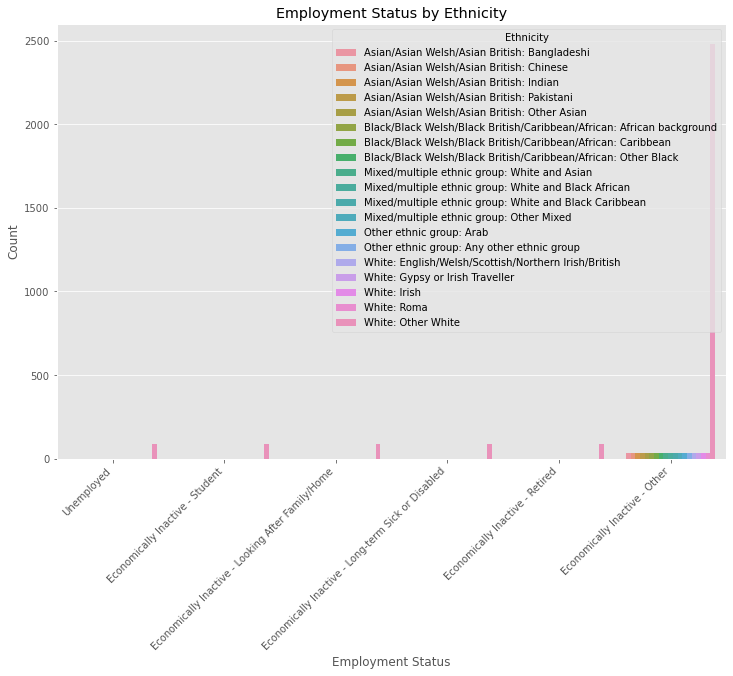

In [28]:
# Employment status by ethnicity
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Ethnicity', data=combine_df)
plt.title('Employment Status by Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.show()


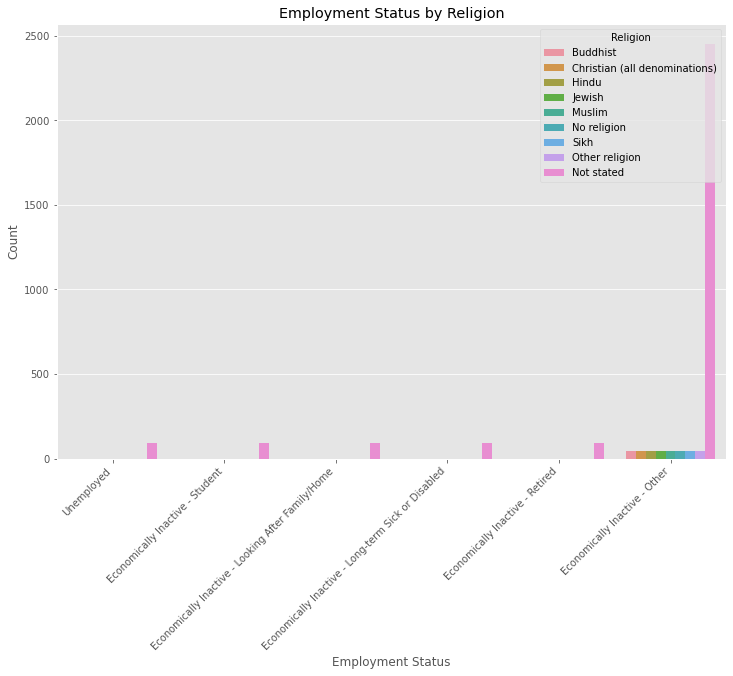

In [32]:
# Employment status by religion
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment Status', hue='Religion', data=combine_df)
plt.title('Employment Status by Religion')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Religion')
plt.show()


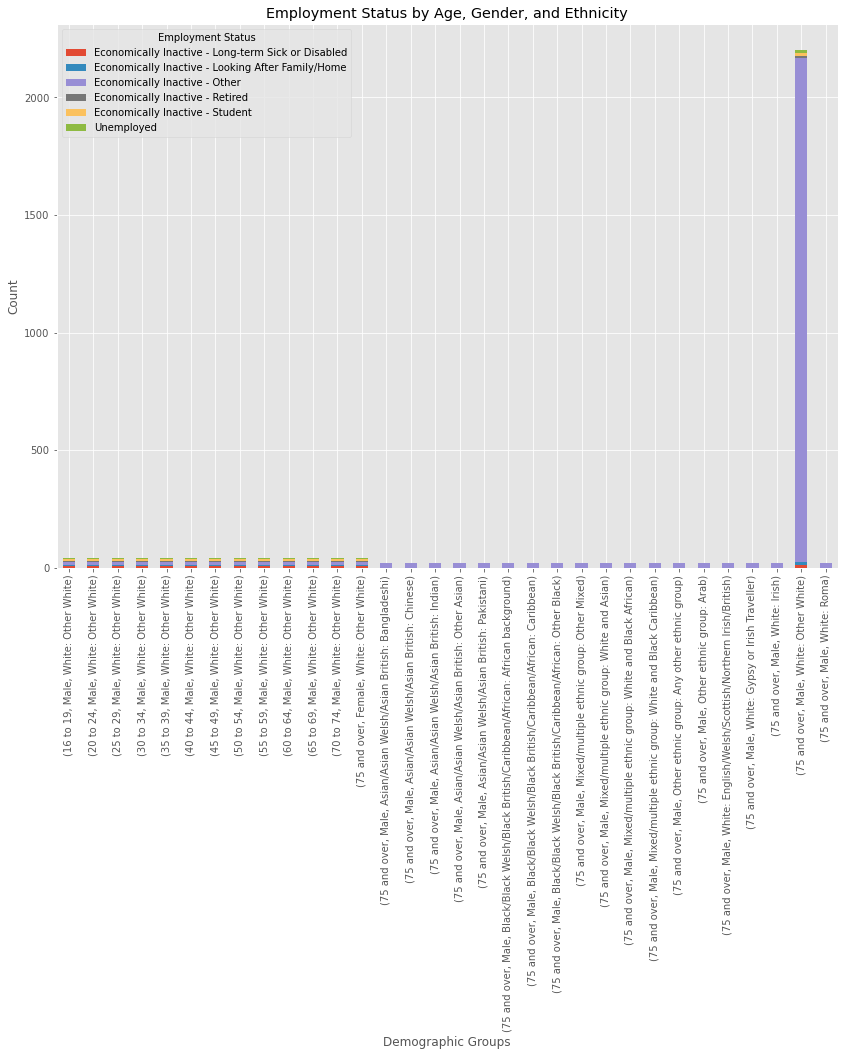

In [35]:
# Employment status by age, gender, and ethnicity
age_gender_ethnicity = pd.crosstab(index=[combine_df['Age'], combine_df['Sex'], combine_df['Ethnicity']], columns=combine_df['Employment Status'])
age_gender_ethnicity.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Employment Status by Age, Gender, and Ethnicity')
plt.xlabel('Demographic Groups')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.show()

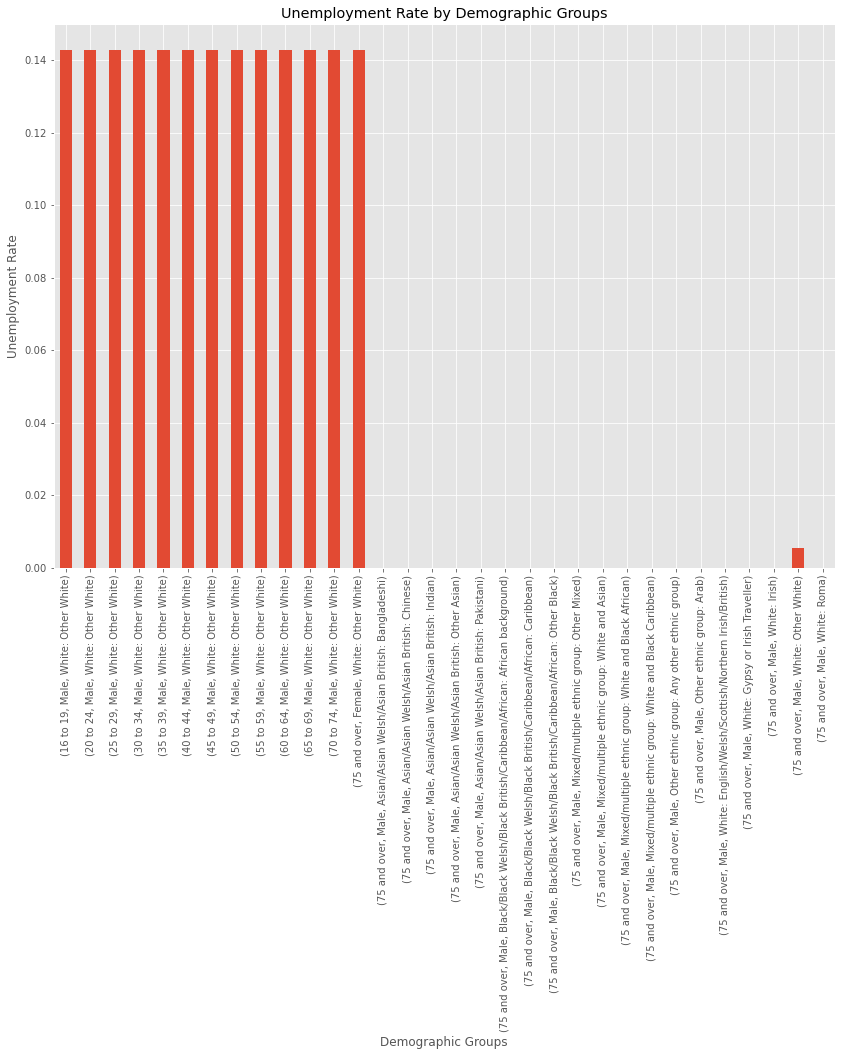

In [36]:
# Unemployment rate by demographic groups
unemployment_rate = combine_df[combine_df['Employment Status'] == 'Unemployed'].groupby(['Age', 'Sex', 'Ethnicity']).size() / combine_df.groupby(['Age', 'Sex', 'Ethnicity']).size()
unemployment_rate.plot(kind='bar', figsize=(14, 10))
plt.title('Unemployment Rate by Demographic Groups')
plt.xlabel('Demographic Groups')
plt.ylabel('Unemployment Rate')
plt.show()

In [37]:
combine_df.columns

Index(['Employment History', 'Employment Status', 'Age', 'Population estimate',
       'Percentage within age and employment history',
       'Percentage within age and employment status',
       'Percentage within employment status and employment history', 'Country',
       'Employment status', 'Percentage within country and employment history',
       'Percentage within country and employment status', 'Ethnicity',
       'Percentage within ethnicity and employment history',
       'Percentage within ethnicity and employment status', 'Religion',
       'Percentage within religion and employment history',
       'Percentage within religion and employment status', 'Sex',
       'Percentage within sex and employment history',
       'Percentage within sex and employment status', 'Percentage within age',
       'Percentage within employment history',
       'Percentage within employment status', 'Percentage within religion',
       'Percentage within sex', 'Percentage Estimate', 'Title',


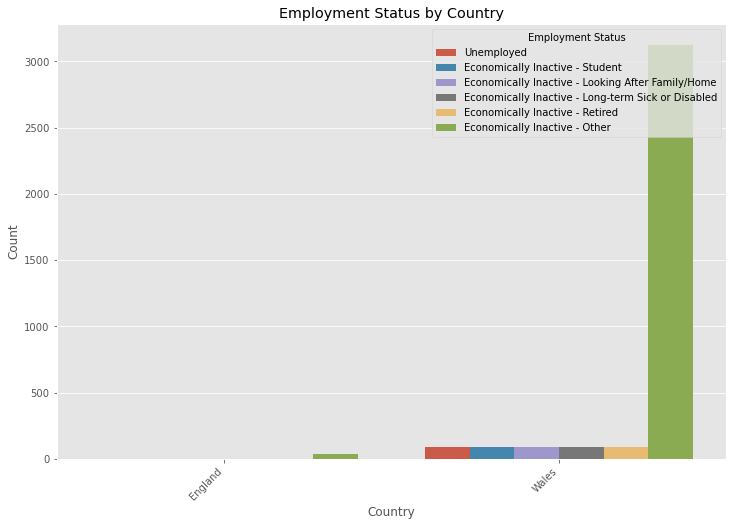

In [38]:
# Employment status by country
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Employment Status', data=combine_df)
plt.title('Employment Status by Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.show()


In [39]:
combine_df['Country'].value_counts()

Wales      3576
England      36
Name: Country, dtype: int64

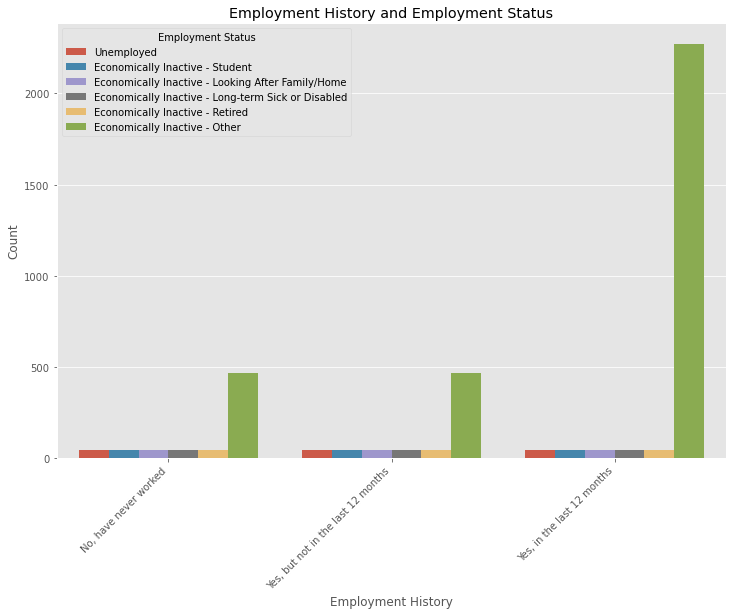

In [40]:
# Employment history and employment status
plt.figure(figsize=(12, 8))
sns.countplot(x='Employment History', hue='Employment Status', data=combine_df)
plt.title('Employment History and Employment Status')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment History')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.show()

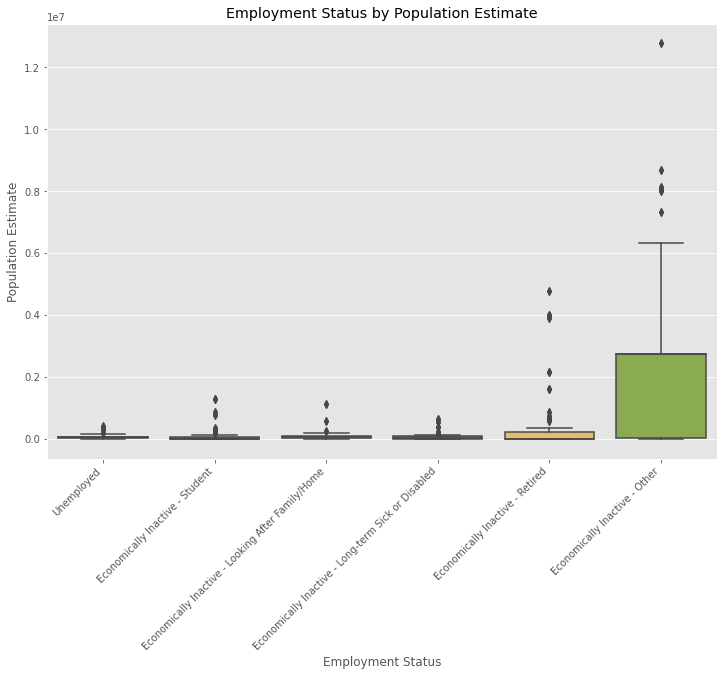

In [41]:
# Employment status by population estimate
plt.figure(figsize=(12, 8))
sns.boxplot(x='Employment Status', y='Population estimate', data=combine_df)
plt.title('Employment Status by Population Estimate')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Population Estimate')
plt.show()

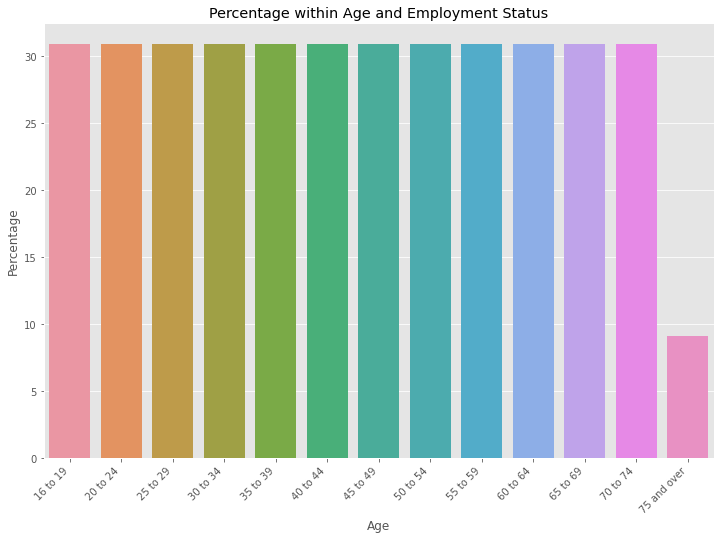

In [42]:
# Percentage within age and employment status
age_employment_percentage = combine_df.groupby('Age')['Percentage within age and employment status'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Percentage within age and employment status', data=age_employment_percentage)
plt.title('Percentage within Age and Employment Status')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

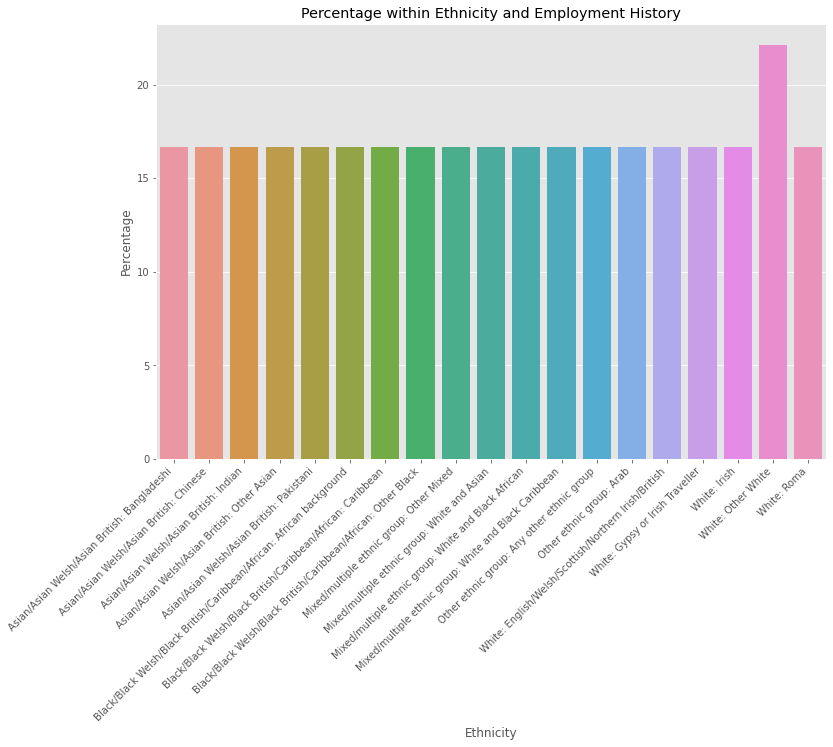

In [43]:
# Percentage within ethnicity and employment history
ethnicity_employment_percentage = combine_df.groupby('Ethnicity')['Percentage within ethnicity and employment history'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Ethnicity', y='Percentage within ethnicity and employment history', data=ethnicity_employment_percentage)
plt.title('Percentage within Ethnicity and Employment History')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.show()

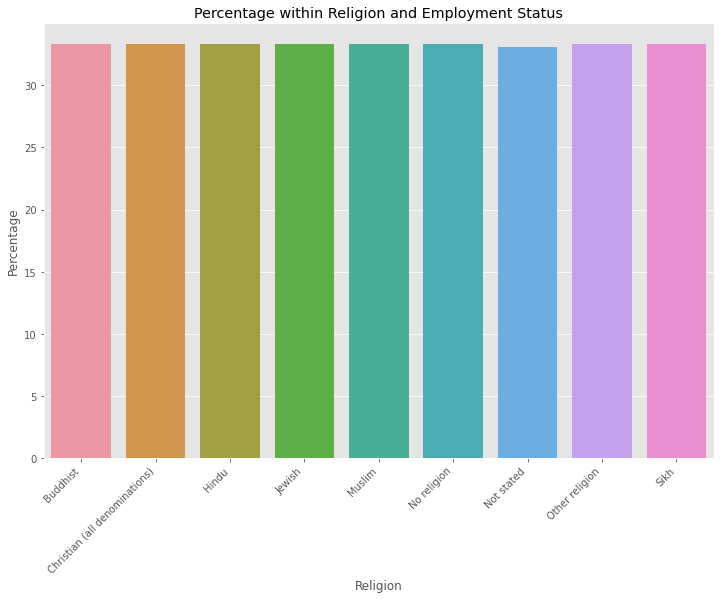

In [44]:
# Percentage within religion and employment status
religion_employment_percentage = combine_df.groupby('Religion')['Percentage within religion and employment status'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Religion', y='Percentage within religion and employment status', data=religion_employment_percentage)
plt.title('Percentage within Religion and Employment Status')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Religion')
plt.ylabel('Percentage')
plt.show()

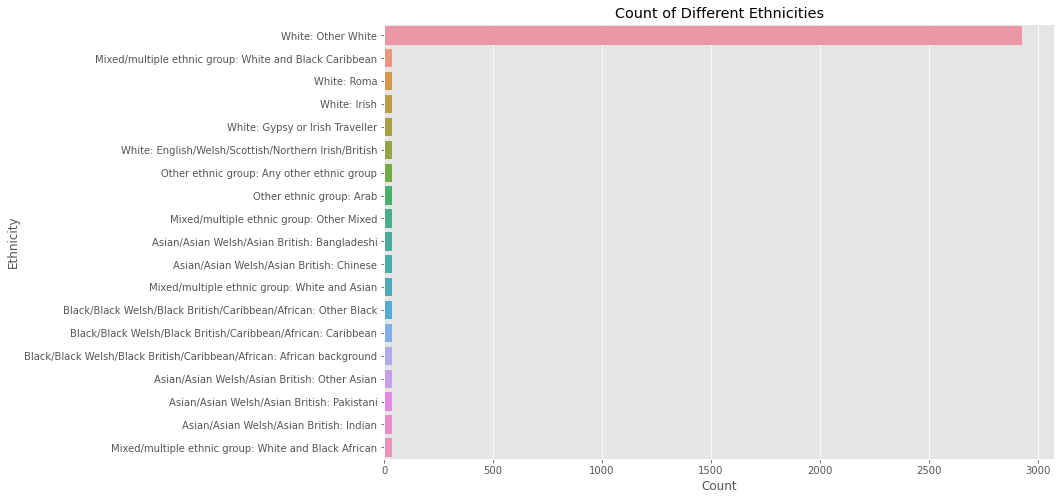

In [45]:
# Ethnicity count
plt.figure(figsize=(12, 8))
sns.countplot(y='Ethnicity', data=combine_df, order=combine_df['Ethnicity'].value_counts().index)
plt.title('Count of Different Ethnicities')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

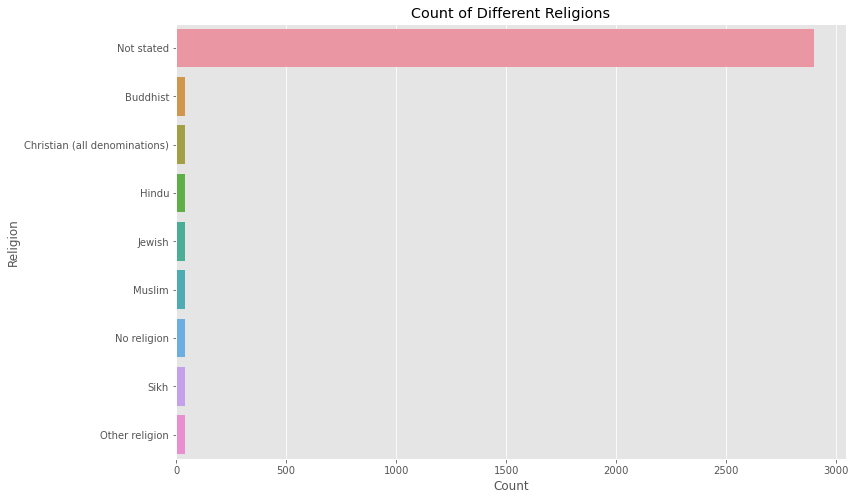

In [46]:
# Religion count
plt.figure(figsize=(12, 8))
sns.countplot(y='Religion', data=combine_df, order=combine_df['Religion'].value_counts().index)
plt.title('Count of Different Religions')
plt.xlabel('Count')
plt.ylabel('Religion')
plt.show()

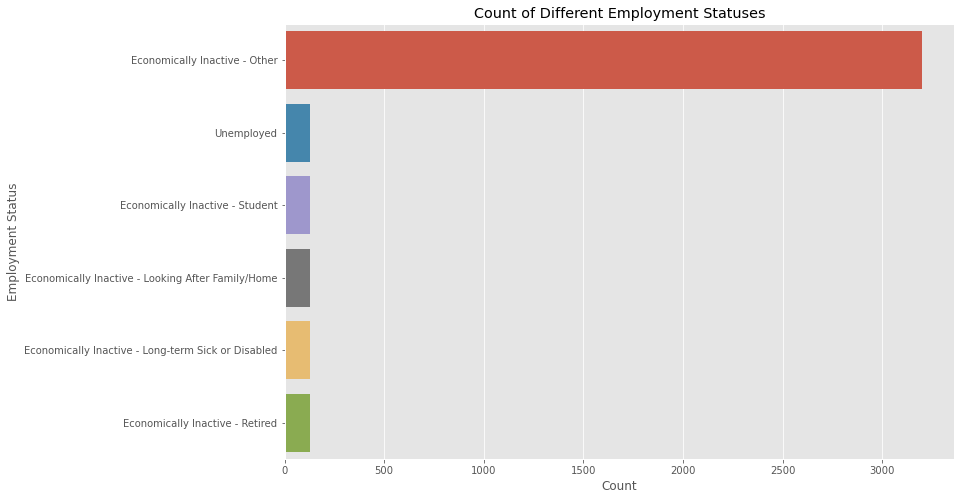

In [47]:
# Employment status count
plt.figure(figsize=(12, 8))
sns.countplot(y='Employment Status', data=combine_df, order=combine_df['Employment Status'].value_counts().index)
plt.title('Count of Different Employment Statuses')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.show()


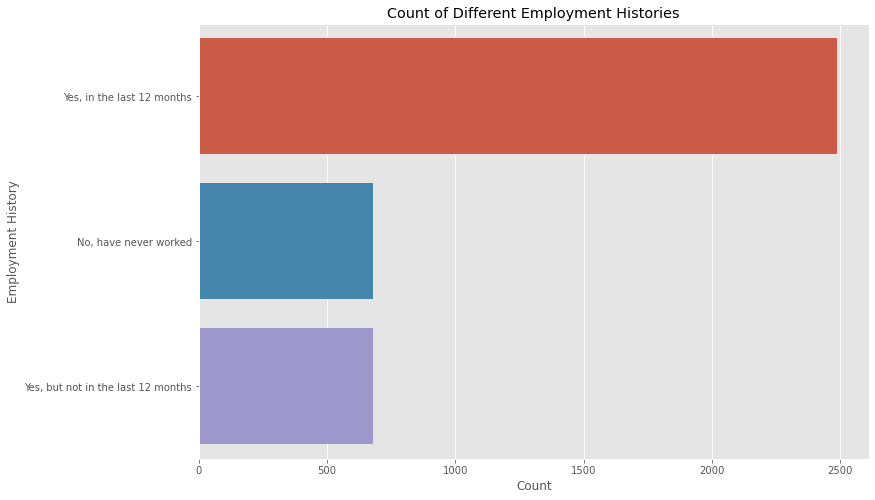

In [48]:
# Employment history count
plt.figure(figsize=(12, 8))
sns.countplot(y='Employment History', data=combine_df, order=combine_df['Employment History'].value_counts().index)
plt.title('Count of Different Employment Histories')
plt.xlabel('Count')
plt.ylabel('Employment History')
plt.show()


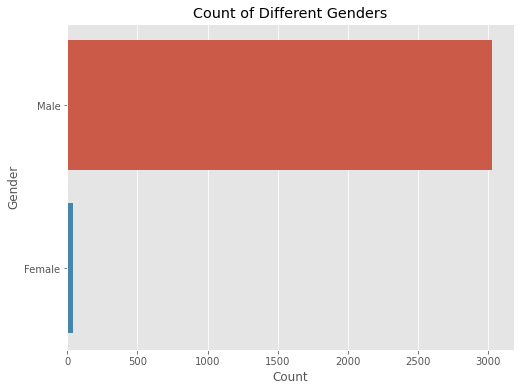

In [49]:
# Gender count
plt.figure(figsize=(8, 6))
sns.countplot(y='Sex', data=combine_df, order=combine_df['Sex'].value_counts().index)
plt.title('Count of Different Genders')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

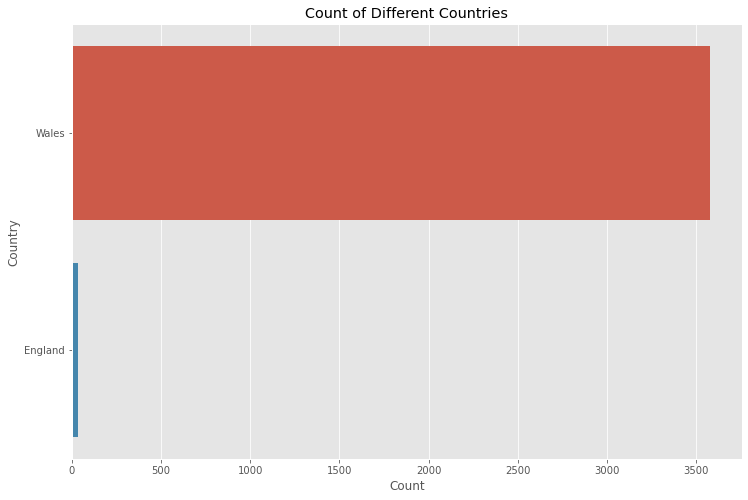

In [50]:
# Country count
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=combine_df, order=combine_df['Country'].value_counts().index)
plt.title('Count of Different Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [51]:
df_time = pd.read_csv("series-140524.csv")

In [52]:
df_time.head()

,Title,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
0,1971,4.1
1,1972,4.3
2,1973,3.7
3,1974,3.7
4,1975,4.5


In [53]:
df_time.columns

Index(['Title', 'Unemployment rate (aged 16 and over, seasonally adjusted): %'], dtype='object')

In [54]:
# Function to convert time to datetime
def convert_to_datetime(time_str):
    try:
        if 'Q' in time_str:
            year, quarter = time_str.split()
            month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}[quarter]
            return pd.to_datetime(f"{year}-{month}-01")
        elif any(month in time_str for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']):
            year, month_abbr = time_str.split()
            month = {
                'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06',
                'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
            }[month_abbr]
            return pd.to_datetime(f"{year}-{month}-01")
        else:
            return pd.to_datetime(f"{time_str}-01-01")
    except Exception as e:
        print(f"Error parsing date: {time_str}, Error: {e}")
        return pd.NaT

# Apply the conversion function to the 'Title' column
df_time['Date'] = df_time['Title'].apply(convert_to_datetime)

# Drop rows where date parsing failed (optional)
df_time = df_time.dropna(subset=['Date'])

# Set the 'Date' column as the index
#df_time.set_index('Date', inplace=True)

# Drop the original 'Title' column if not needed
df_time.drop(columns=['Title'], inplace=True)
# Extract year, month, and quarter from the 'Date' column
df_time['Year'] = df_time['Date'].dt.year
df_time['Month'] = df_time['Date'].dt.month
df_time['Quarter'] = df_time['Date'].dt.to_period('Q')

df_time.head()

,"Unemployment rate (aged 16 and over, seasonally adjusted): %",Date,Year,Month,Quarter
0,4.1,1971-01-01,1971,1,1971Q1
1,4.3,1972-01-01,1972,1,1972Q1
2,3.7,1973-01-01,1973,1,1973Q1
3,3.7,1974-01-01,1974,1,1974Q1
4,4.5,1975-01-01,1975,1,1975Q1


In [55]:
# Summary statistics
df_time.describe()

,"Unemployment rate (aged 16 and over, seasonally adjusted): %",Year,Month
count,903.000000,903.000000,903.000000
mean,6.703654,1997.118494,5.931340
std,2.373467,15.342806,3.576491
min,3.400000,1971.000000,1.000000
25%,4.900000,1984.000000,3.000000
50%,5.700000,1997.000000,6.000000
75%,8.300000,2010.000000,9.000000
max,11.900000,2024.000000,12.000000


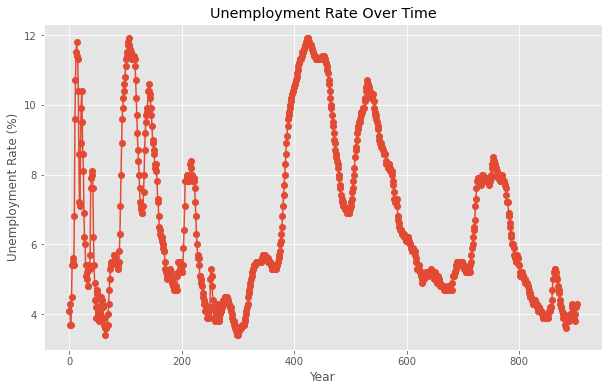

In [56]:
import matplotlib.pyplot as plt

# Plotting the unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_time.index, df_time['Unemployment rate (aged 16 and over, seasonally adjusted): %'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [57]:
# Year-over-year percentage change
df_time['YoY Change (%)'] = df_time['Unemployment rate (aged 16 and over, seasonally adjusted): %'].pct_change() * 100
df_time.head()

,"Unemployment rate (aged 16 and over, seasonally adjusted): %",Date,Year,Month,Quarter,YoY Change (%)
0,4.1,1971-01-01,1971,1,1971Q1,NaN
1,4.3,1972-01-01,1972,1,1972Q1,4.878049
2,3.7,1973-01-01,1973,1,1973Q1,-13.953488
3,3.7,1974-01-01,1974,1,1974Q1,0.000000
4,4.5,1975-01-01,1975,1,1975Q1,21.621622


In [58]:
# Plotting the unemployment rate over time (Yearly)
plt.figure(figsize=(10, 6))
plt.plot(df_time.resample('Y').mean().index, df_time.resample('Y').mean()['Unemployment rate (aged 16 and over, seasonally adjusted): %'], marker='o')
plt.title('Unemployment Rate Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<Figure size 720x432 with 0 Axes>

In [59]:
df_time.tail()

,"Unemployment rate (aged 16 and over, seasonally adjusted): %",Date,Year,Month,Quarter,YoY Change (%)
898,3.9,2023-10-01,2023,10,2023Q4,-2.500000
899,3.8,2023-11-01,2023,11,2023Q4,-2.564103
900,4.0,2023-12-01,2023,12,2023Q4,5.263158
901,4.2,2024-01-01,2024,1,2024Q1,5.000000
902,4.3,2024-02-01,2024,2,2024Q1,2.380952


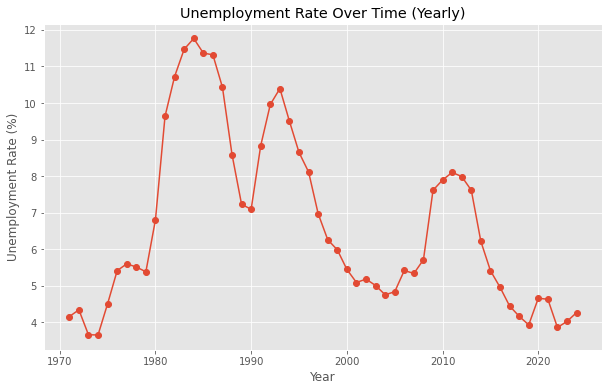

In [60]:
# Plotting the unemployment rate over time (Yearly)
plt.figure(figsize=(10, 6))
df_time.groupby('Year')['Unemployment rate (aged 16 and over, seasonally adjusted): %'].mean().plot(marker='o')
plt.title('Unemployment Rate Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

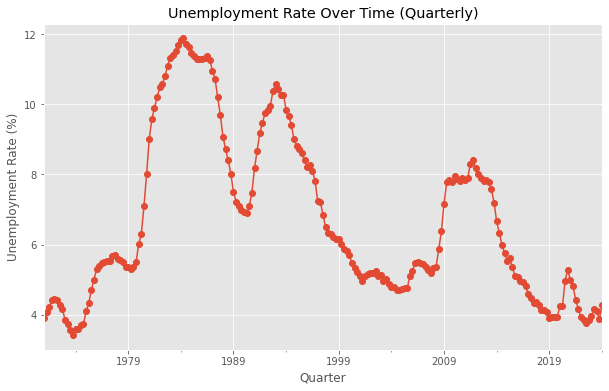

In [61]:
# Plotting the unemployment rate over time (Quarterly)
plt.figure(figsize=(10, 6))
df_time.groupby('Quarter')['Unemployment rate (aged 16 and over, seasonally adjusted): %'].mean().plot(marker='o')
plt.title('Unemployment Rate Over Time (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


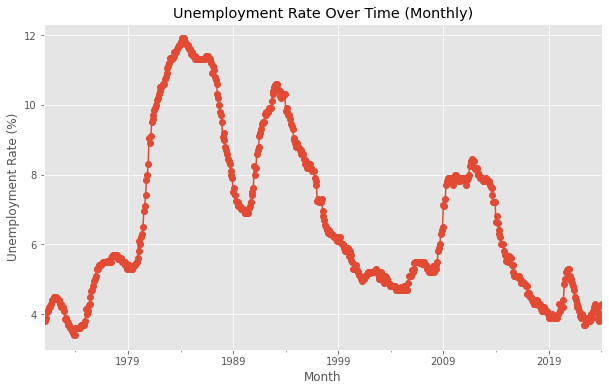

In [62]:
# Plotting the unemployment rate over time (Monthly)
plt.figure(figsize=(10, 6))
df_time.set_index('Date').resample('M').mean()['Unemployment rate (aged 16 and over, seasonally adjusted): %'].plot(marker='o')
plt.title('Unemployment Rate Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()